### Pós-Graduação - Data Science and Digital Transformation
#### Ambientes de Programação para Ciência de Dados - Projeto 1 
#### Aluno: Yvan Pereira de Oliveira

<b> PRIMEIRA PARTE</b>\
A primeira parte do trabalho consiste na utilização de Python e suas bibliotecas para explorar e interpretar a informação que consta nos dois ficheiros.\
Realize uma análise inicial aos dados constantes em ambos os ficheiros e interprete o seu conteúdo, respondendo as questões abaixo.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<b>A - incendios_sc.csv<b>

In [2]:
df1 = pd.read_csv("incendios_sv.csv") #Importando o ficheiro incendios_sv.csv

In [3]:
df1.head() #Exibindo os primeiros dados do ficheiro

,DataHora,Satelite,Municipi,RiscoFog
0,2018/01/01 00:04:15,GOES-16,MARCELANDIA,0.00
1,2018/01/01 00:29:09,GOES-13,MAUES,NaN
2,2018/01/01 00:29:09,GOES-13,MAUES,0.03
3,2018/01/01 00:54:55,METOP-B,TAILANDIA,0.00
4,2018/01/01 01:31:29,GOES-13,PARECIS,0.25


In [4]:
start = "\033[1m" #Início de texto em negrito em 'print'
end = "\033[0;0m" #Fim de texto em negrito em 'print'

1. Qual é a dimensão do conjunto de dados?

In [5]:
print('Dimensão:', start, df1.shape, end)

Dimensão:  (9468639, 4) 


2. Qual o nome das colunas e que tipo de dados que lhe estão associados? 

In [6]:
df1.dtypes

DataHora     object
Satelite     object
Municipi     object
RiscoFog    float64
dtype: object

3. Existem valores NaN? Se sim, em quantidade significativa? Em que colunas?

In [7]:
df1.isnull().any() #Verificando se há valores numéricos nulos

DataHora    False
Satelite    False
Municipi    False
RiscoFog     True
dtype: bool

In [8]:
# Verificando a quantidade de valores numéricos nulos nas colunas 
df1.isnull().sum()

DataHora         0
Satelite         0
Municipi         0
RiscoFog    159123
dtype: int64

In [9]:
print("Apenas em", start, "RiscoFog", end, "há valores numéricos nulos e em", start, "quantidade expressiva.", end)

Apenas em  RiscoFog  há valores numéricos nulos e em  quantidade expressiva. 


4. Qual é o intervalo temporal a que o conjunto de dados se reporta? 

In [10]:
df1['DataHora'] = pd.to_datetime(df1['DataHora'])

dt_i = df1['DataHora'].min()
dt_f = df1['DataHora'].max()

print("O intervalo é de", start, dt_i, end,"a", start,dt_f,end,".")

O intervalo é de  2018-01-01 00:04:15  a  2022-12-31 18:10:00  .


5. O que é que a análise dos dados coluna “Satelite” indica?

In [11]:
df1['Satelite'].value_counts()

GOES-16      2853133
NOAA-20      2376293
NPP-375      2049621
NPP-375D      852261
AQUA_M-T      450805
NOAA-19       246835
TERRA_M-T     156721
TERRA_M-M     128320
METOP-B       116449
NOAA-18D       90085
AQUA_M-M       55762
METOP-C        28550
MSG-03         25821
NOAA-18        15739
NOAA-19D       13603
NOAA-15         8141
GOES-13          312
NOAA-15D         188
Name: Satelite, dtype: int64

In [12]:
print("Indica as", start, "ocorrências por satélite.", end)

Indica as  ocorrências por satélite. 


6. Os satélites disponíveis ao longo dos anos foram sempre os mesmos? 

In [13]:
df1['Ano'] = pd.DatetimeIndex(df1['DataHora']).year #Criando uma nova coluna para extrair o ano da coluna DataHora
df1['Mes'] = pd.DatetimeIndex(df1['DataHora']).month #Criando uma nova coluna para extrair o mês da coluna DataHora

In [14]:
satelite_ano = df1.groupby(['Ano','Satelite']).size().reset_index(name='Satelites disponiveis') #Agrupando em um DataFrame os satélites disponíveis por ano
satelite_ano.head()

,Ano,Satelite,Satelites disponiveis
0,2018,AQUA_M-M,6417
1,2018,AQUA_M-T,68345
2,2018,GOES-13,312
3,2018,GOES-16,290336
4,2018,METOP-B,17861


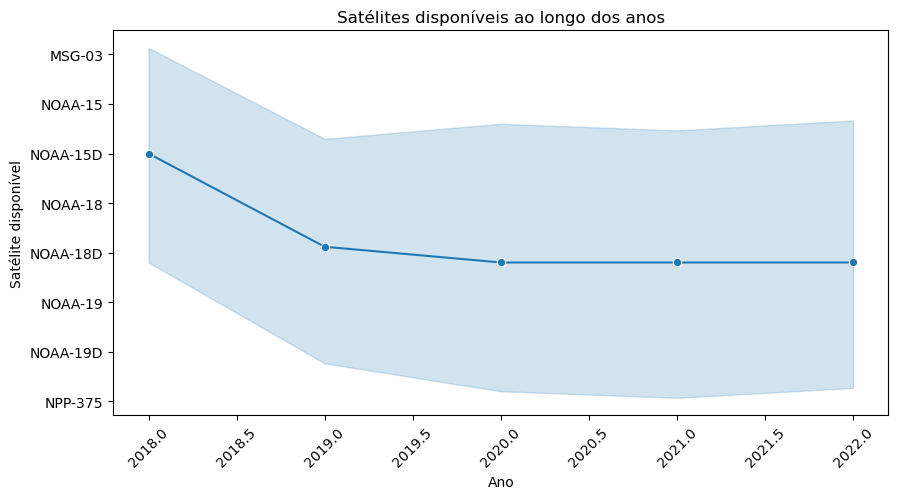

In [15]:
df1['DataHora'] = pd.to_datetime(df1['DataHora'])

df_satelite_tempo = satelite_ano[['Ano', 'Satelite']].drop_duplicates()

plt.figure(figsize = (10, 5))
sns.lineplot(data = df_satelite_tempo, x = 'Ano', y = 'Satelite', marker = 'o')
plt.title('Satélites disponíveis ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Satélite disponível')
plt.xticks(rotation = 45)
plt.show()

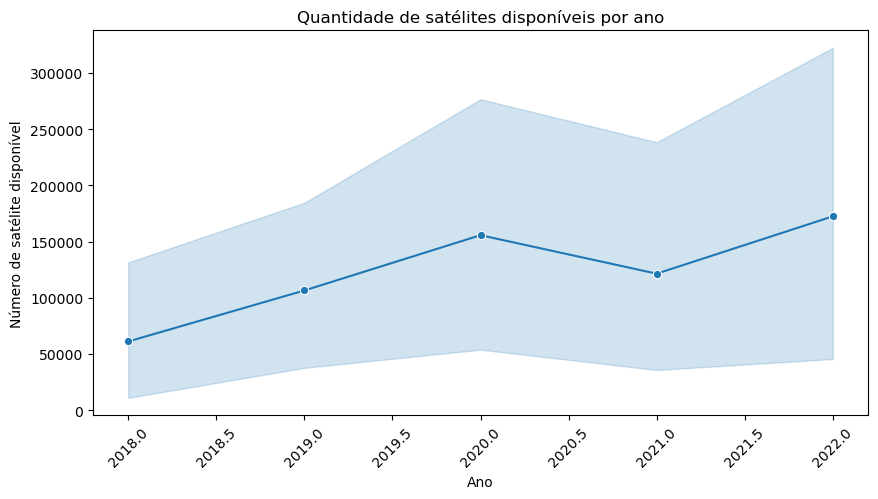

In [16]:
df1['DataHora'] = pd.to_datetime(df1['DataHora'])

df_satelite_qtd = satelite_ano[['Ano', 'Satelites disponiveis']].drop_duplicates()

plt.figure(figsize = (10, 5))
sns.lineplot(data = df_satelite_qtd, x = 'Ano', y = 'Satelites disponiveis', marker = 'o')
plt.title('Quantidade de satélites disponíveis por ano')
plt.xlabel('Ano')
plt.ylabel('Número de satélite disponível')
plt.xticks(rotation = 45)
plt.show()

In [17]:
# Verificando se o número de satélites únicos é sempre o mesmo
satelites = df1.groupby('Ano')['Satelite'].nunique()

if satelites.nunique() == 1:
    print("Os satélites disponíveis ao longo dos anos foram sempre os mesmos.")
else:
    print("Os satélites disponíveis ao longo dos anos", start, "NÃO" , end, "foram sempre os mesmos.")

Os satélites disponíveis ao longo dos anos  NÃO  foram sempre os mesmos.


<b>B - estados.csv</b>

In [18]:
df2 = pd.read_csv("estados.csv") #Importando o ficheiro estados.csv
df2.head()

,Estado,Municipio
0,MATO GROSSO,MARCELANDIA
1,MATO GROSSO,COLNIZA
2,MATO GROSSO,JUARA
3,MATO GROSSO,COTRIGUACU
4,MATO GROSSO,PARANAITA


7. Qual é a dimensão do conjunto de dados?

In [19]:
print('Dimensão:', start, df2.shape, end)

Dimensão:  (550, 2) 


8. Quantos municípios e quantos estados estão presentes? 

In [20]:
mun = df2['Municipio'].nunique()
est = df2['Estado'].nunique()

print("Há", start, mun, "municípios", end, "e", start, est, "estados.")

Há  546 municípios  e  9 estados.


9. Existem valores NaN?

In [21]:
df2.isnull().any()

Estado       False
Municipio    False
dtype: bool

In [22]:
print(start, "NÃO", end,"há valores NaN.")

 NÃO  há valores NaN.


<b> SEGUNDA PARTE</b>\
A segunda parte do trabalho consiste em analisar os focos de incêndio temporal e espacialmente. Para
isso, utilize Python e as bibliotecas adequadas para, a a partir dos dados fornecidos, criar um conjunto
de dados (a gravação para ficheiro .csv é opcional) com as seguintes colunas:
- Ano
- Mês
- Estado
- Nº de ocorrências


In [23]:
#Extraindo dados do primerio DataFrame
df3 = df1.groupby(['Ano', 'Mes', 'Municipi']).size().reset_index(name='Nº de ocorrências')
df3.head()

,Ano,Mes,Municipi,Nº de ocorrências
0,2018,1,ABAETETUBA,8
1,2018,1,ABEL FIGUEIREDO,3
2,2018,1,ACAILANDIA,70
3,2018,1,ACARA,45
4,2018,1,AFUA,2


In [24]:
#Extraindo dados do segundo DataFrame
df4 = df2.groupby(['Estado','Municipio']).size().reset_index()
df4.head()

,Estado,Municipio,0
0,ACRE,ACRELANDIA,1
1,ACRE,ASSIS BRASIL,1
2,ACRE,BRASILEIA,1
3,ACRE,BUJARI,1
4,ACRE,CAPIXABA,1


In [25]:
#Unindo os dados dos dois DataFrames em função da coluna 'município' em ambas
df_novo = pd.merge(df3, df4, right_on="Municipio", left_on = "Municipi", how='outer')
df_novo.head()

,Ano,Mes,Municipi,Nº de ocorrências,Estado,Municipio,0
0,2018,1,ABAETETUBA,8,PARA,ABAETETUBA,1
1,2018,6,ABAETETUBA,22,PARA,ABAETETUBA,1
2,2018,7,ABAETETUBA,62,PARA,ABAETETUBA,1
3,2018,8,ABAETETUBA,88,PARA,ABAETETUBA,1
4,2018,9,ABAETETUBA,64,PARA,ABAETETUBA,1


In [26]:
#Excluindo a coluna repetida e guardando em 'ficheiro'
ficheiro = df_novo.drop(['Municipi','Municipio'], axis=1)
ficheiro.head()

,Ano,Mes,Nº de ocorrências,Estado,0
0,2018,1,8,PARA,1
1,2018,6,22,PARA,1
2,2018,7,62,PARA,1
3,2018,8,88,PARA,1
4,2018,9,64,PARA,1


Analise os seguintes aspetos, fornecendo evidências das conclusões a que chega:

1. Evolução do número total de incêndios ao longo dos anos. Existe uma tendência assinalável? Quais os anos em que o número de incêndios foi mínimo e máximo?

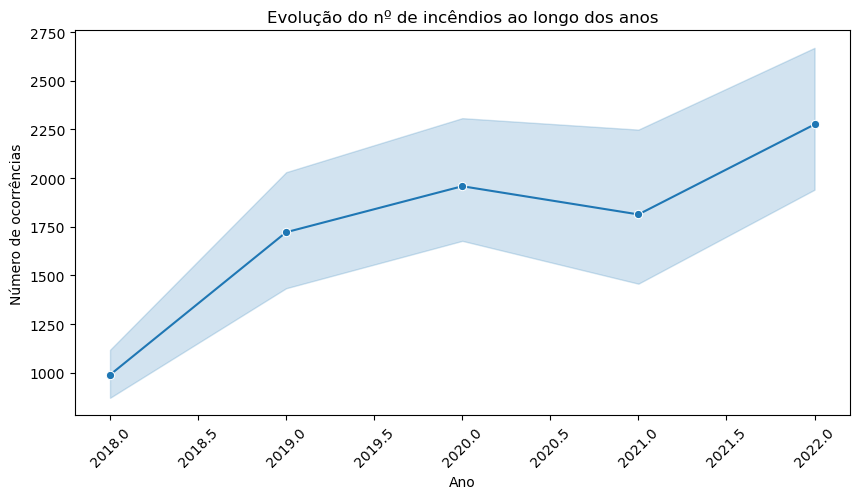

In [27]:
incendio_anos = ficheiro[['Ano', 'Nº de ocorrências']].drop_duplicates()

#Gráfico da evolução temporal dos satélites
plt.figure(figsize=(10, 5))
sns.lineplot(data=incendio_anos, x='Ano', y='Nº de ocorrências', marker='o')
plt.title('Evolução do nº de incêndios ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Número de ocorrências')
plt.xticks(rotation=45)
plt.show()

In [28]:
#Verificando se há tendência assinalável

import numpy as np
from scipy.stats import linregress

x = incendio_anos['Ano']
y = incendio_anos['Nº de ocorrências']

slope, _, _, _, _ = linregress(x, y)

if np.abs(slope) > 0:
    print(start,"Sim,", end, "há uma tendência assinalável.")
else:
    print(start,"Não", end, "há tendência assinalável.")


 Sim,  há uma tendência assinalável.


In [29]:
#Verificando os anos em que o número de incêndios foi mínimo e máximo

ano_min = ficheiro['Ano'].loc[ficheiro['Nº de ocorrências'].idxmin()]
ano_max = ficheiro['Ano'].loc[ficheiro['Nº de ocorrências'].idxmax()]

print("Ano em que o número de incêndios foi mínimo:",start, ano_min, end)
print("Ano em que o número de incêndios foi máximo:",start, ano_max, end)

Ano em que o número de incêndios foi mínimo:  2019 
Ano em que o número de incêndios foi máximo:  2021 


2. Distribuição do número de incêndios ao longo dos meses do ano (valores médios no intervalo representado). 

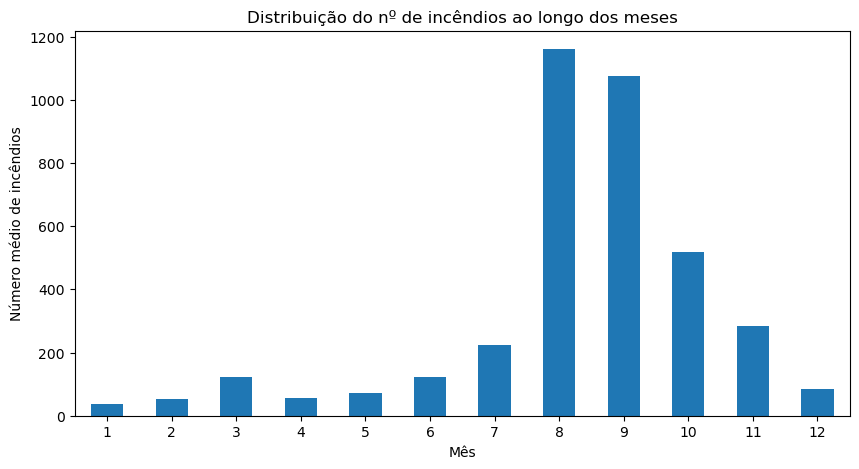

In [30]:
#Calculando a média de número de incêndios por mês
incendios_mes = ficheiro.groupby('Mes')['Nº de ocorrências'].mean()

plt.figure(figsize=(10, 5))
incendios_mes.plot(kind='bar')
plt.title('Distribuição do nº de incêndios ao longo dos meses')
plt.xlabel('Mês')
plt.ylabel('Número médio de incêndios')
plt.xticks(rotation=0)
plt.show()

3. Número total de incêndios em cada estado no intervalo representado, assim como o valor médio e o respetivo desvio padrão. Quais os estados com número máximo e mínimo de incêndios?


In [31]:
#Total de incêndios por estado
incendios_total = ficheiro.groupby('Estado')['Nº de ocorrências'].sum()
print("O número total de incêndios em cada estado no intervalo representado é igual a:")
incendios_total

O número total de incêndios em cada estado no intervalo representado é igual a:


Estado
ACRE            451957
AMAPA            61173
AMAZONAS       1407061
MARANHAO        386239
MATO GROSSO    2266448
PARA           3354253
RONDONIA       1235311
RORAIMA         316812
TOCANTINS        55626
Name: Nº de ocorrências, dtype: int64

In [32]:
#Média de incêndios por estado
incendios_media = ficheiro.groupby('Estado')['Nº de ocorrências'].mean()
print("O valor médio de incêndios em cada estado no intervalo representado é igual a:")
incendios_media

O valor médio de incêndios em cada estado no intervalo representado é igual a:


Estado
ACRE           424.771617
AMAPA          105.289157
AMAZONAS       443.867823
MARANHAO        90.730327
MATO GROSSO    462.918301
PARA           480.552006
RONDONIA       474.389785
RORAIMA        378.961722
TOCANTINS       43.662480
Name: Nº de ocorrências, dtype: float64

In [33]:
#Desvio padrão de incêndios por estado
incendios_desvio = ficheiro.groupby('Estado')['Nº de ocorrências'].std()
print("O desvio padrão de incêndios em cada estado no intervalo representado é igual a:")
incendios_desvio

O desvio padrão de incêndios em cada estado no intervalo representado é igual a:


Estado
ACRE           1227.305744
AMAPA           228.976024
AMAZONAS       3176.061424
MARANHAO        251.240828
MATO GROSSO    1644.762108
PARA           2960.803806
RONDONIA       2539.399746
RORAIMA        1670.754894
TOCANTINS       138.004858
Name: Nº de ocorrências, dtype: float64

In [34]:
#Estados com número máximo e mínimo de incêndios
estados_max = incendios_total.idxmax()
estados_min = incendios_total.idxmin()

print("O estado com número máximo de incêndios é:", start, estados_max, end)
print("O estado com número mínimo de incêndios é:", start, estados_min, end)

O estado com número máximo de incêndios é:  PARA 
O estado com número mínimo de incêndios é:  TOCANTINS 


4. Use os estados identificados na questão anterior e analise a evolução do número de incêndios ao longo dos anos em cada um desses estados.

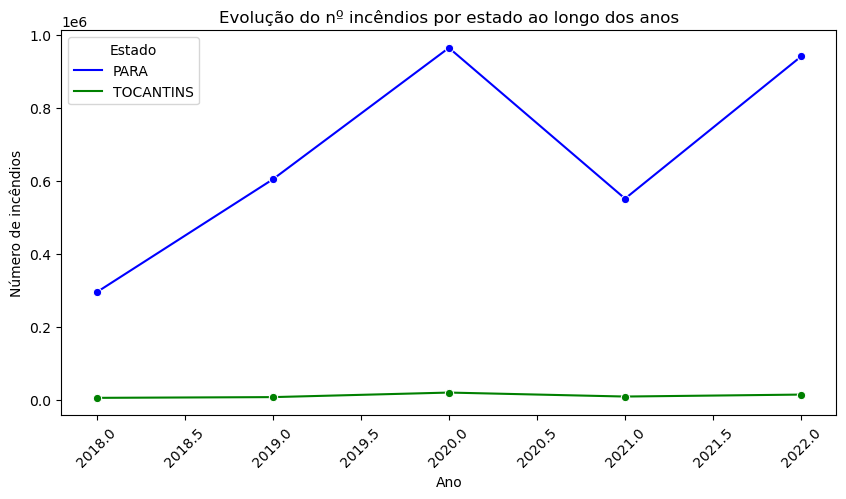

In [35]:
estados_max_min = [estados_max, estados_min]
estados = ficheiro[ficheiro['Estado'].isin(estados_max_min)]

evolucao_estados = estados.groupby(['Ano', 'Estado'])['Nº de ocorrências'].sum().reset_index()

plt.figure(figsize = (10, 5))
sns.lineplot(data = evolucao_estados, x = 'Ano', y = 'Nº de ocorrências', hue = 'Estado', marker = 'o', palette=['b', 'g'])
plt.title('Evolução do nº incêndios por estado ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Número de incêndios')
plt.xticks(rotation = 45)
plt.legend(title = 'Estado')
plt.show()